In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
import os
from requests import get
from urllib.parse import urlparse

In [4]:
def cache_data(src:str, dest:str) -> str: #just tell the function to return a string
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    # *path:Join more path components intelligently.
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest) #multiple items in path
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True) 
            #not sure how many items need to be joined, so add * for multiple items.
            # exist_ok=True if directory exists then ignore it, exist_ok=False if directory exists, it error.
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [5]:
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )

#gpd geopandas
print('Done.')

Found data\geo\Boroughs.gpkg locally!
Found data\geo\Water.gpkg locally!
Found data\geo\Greenspace.gpkg locally!
Done.


In [6]:
folder=[boros,water,green]
for f in folder:
    print(f.crs)

epsg:27700
epsg:27700
epsg:27700


<AxesSubplot:>

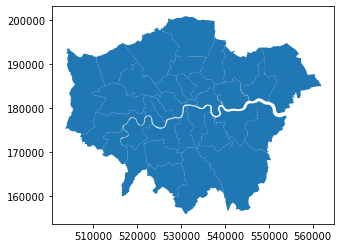

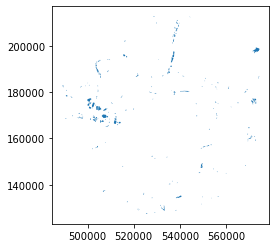

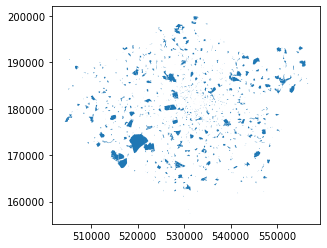

In [7]:
folder[0].plot()
folder[1].plot()
folder[2].plot()

<AxesSubplot:>

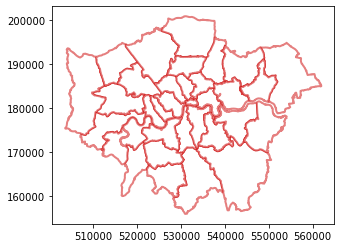

In [8]:
#Thick red borough borders, and
#White fill colour.
boros.plot(facecolor='white',edgecolor=(0.8, 0, 0, 0.5),linewidth=2)
#(0.8, 0, 0, 0.5) (red-green-blue-alpha)

<AxesSubplot:>

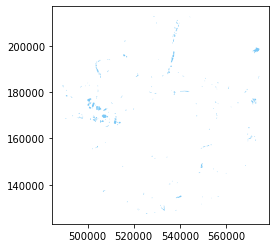

In [9]:
#No color for an edge, and an XKCD color for the face.
water.plot(facecolor='XKCD:Lightblue', edgecolor='none')

<AxesSubplot:>

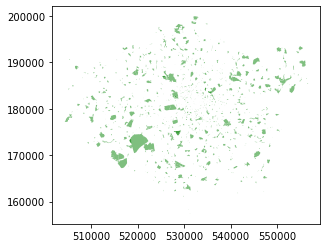

In [10]:
#No edge color.
#A partially transparent green specified as a tuple.
green.plot(facecolor='green', alpha=0.5,edgecolor='none')

(153000.0, 204000.0)

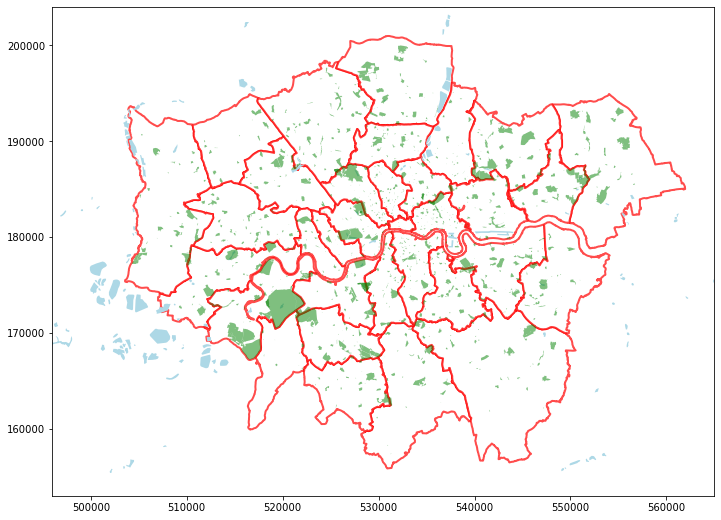

In [11]:
scale=1e5
fig, ax = plt.subplots(1,1, figsize=(12,9))
boros.plot(ax=ax,facecolor='white',alpha=0.7, edgecolor='red',linewidth=2)
water.plot(ax=ax,facecolor='Lightblue', edgecolor='none')
green.plot(ax=ax,facecolor='green', alpha=0.5,edgecolor='none')
# Plot all three to the same axes
ax.set_xlim([4.96*scale, +5.65*scale])
ax.set_ylim([1.53*scale, +2.04*scale])
# Set the limits
#plt.save(fig,"done.png")

In [12]:
#'Creating' Geo-Data
# CSV to Pandas
ddir  = os.path.join('data','raw') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

# pdf == pandas dataframe
pdf = pd.read_csv( cache_data(spath+'2020-08-24-listings.csv.gz?raw=true', ddir),
    compression='gzip', low_memory=False)


Found data\raw\2020-08-24-listings.csv.gz locally!


In [13]:
# Free up memory (we're going to reload below)
del(pdf)

In [15]:
cols = ['id','listing_url','price','latitude','longitude',
        'host_id','host_since','property_type','room_type',
        'accommodates','beds','bathrooms_text']
pdf  = pd.read_csv( 'data/raw/2020-08-24-listings.csv.gz' )
#pandas data frame -> pdf
print(f"pdf now contains {pdf.shape[0]} rows.")
pdf.info()

pdf now contains 74188 rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74188 entries, 0 to 74187
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            74186 non-null  float64
 1   listing_url                                   74187 non-null  object 
 2   scrape_id                                     74187 non-null  object 
 3   last_scraped                                  74187 non-null  object 
 4   name                                          74167 non-null  object 
 5   description                                   71329 non-null  object 
 6   neighborhood_overview                         47208 non-null  object 
 7   picture_url                                   74188 non-null  object 
 8   host_id                                       74188 non-null  float64
 9   host_url                        

In [16]:
pdf['price']=pdf.price.str.replace('$','').str.replace(',','')

pdf['price']=pdf['price'].astype('float')

In [17]:
print(pdf['price'])
#pdf['price'] = to_type([ x.replace('$','') for x in pdf['price']],float)
#pdf['price'] = to_type([ x.replace(',','') for x in pdf['price']],float)

0         87.0
1         49.0
2         75.0
3        208.0
4        150.0
         ...  
74183     55.0
74184    200.0
74185    150.0
74186     23.0
74187     80.0
Name: price, Length: 74188, dtype: float64


In [18]:
pdf.drop(pdf[pdf.id.isna()].index.values, axis=0, inplace=True)

In [19]:
print(f"pdf now contains {pdf.shape[0]} rows.")

pdf now contains 74186 rows.


In [93]:
pdf[pdf.id.isna()]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [21]:
pdf.sample(1, random_state=42)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
36628,25339003.0,https://www.airbnb.com/rooms/25339003,20200824024753,2020-08-26,"An Amazing 4Bedroom Home, Central London, Slee...",This four bedroom Victorian house sleeps up to...,"The nearest tube is Westbourne Park, 8 minutes...",https://a0.muscache.com/pictures/4e8c9ca9-09a6...,191329110.0,https://www.airbnb.com/users/show/191329110,...,9.0,9.0,9.0,NaN,t,1.0,1.0,0.0,0.0,2.39


In [98]:
#Drop the rows where the geo-data is likely to be problematic
pdf.drop(pdf[pdf.review_scores_rating.isna()].index.values,axis=0,inplace=True )
pdf.drop(pdf[pdf.reviews_per_month.isna()].index.values,axis=0,inplace=True )
print(f"pdf now contains {pdf.shape[0]} rows.")

pdf now contains 52283 rows.


In [27]:
#Checking Lat/Long
print(f"The bottom-left corner is {np.min(pdf['latitude']):.2f}, {np.min(pdf['longitude']):.2f}")
print(f"The top-right corner is {np.max(pdf['latitude']):.2f}, {np.max(pdf['longitude']):.2f}")
#yctr = ymin+(ymax-ymin)/2


The bottom-left corner is 51.29, -0.50
The top-right corner is 51.68, 0.28


In [ ]:
# Calculate the bounds of the map using the min/max x and y coordinates above.
# Calculate the centroid of the map from the bounds.
# Set an appropriate zoom level.

In [35]:
from math import floor, ceil

# Calculate min and max to two decimal points
xmin = floor(pdf['longitude'].min()*100)/100  # two decimal points
xmax = ceil(pdf['longitude'].max()*100)/100
ymin = floor(pdf['latitude'].min()*100)/100
ymax = ceil(pdf['latitude'].max()*100)/100

print(xmin, xmax, ymin, ymax)

# Calculate the centre of the map
yctr =ymin+(ymax-ymin)/2
xctr =xmin+(xmax-xmin)/2

print(xctr, yctr)

-0.5 0.29 51.29 51.69
-0.10499999999999998 51.489999999999995


In [48]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Rectangle, projections

# Note the basemap can be easily changed
watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)

m = Map(layers=(watercolor, ), center=(yctr, xctr), zoom=8)

rectangle = Rectangle(bounds=( (ymin, xmin), (ymax, xmax) ),
    crs=projections.EPSG4326
)

m.add_layer(rectangle)




In [49]:
m

Map(center=[51.489999999999995, -0.10499999999999998], controls=(ZoomControl(options=['position', 'zoom_in_tex…

In [50]:
# We need to convert our coordinates into some kind of geo-data
gdf = gpd.GeoDataFrame(pdf, 
      geometry=gpd.points_from_xy(pdf['longitude'], pdf['latitude'], crs='epsg:4326'))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
POINT (-0.11121 51.56802)


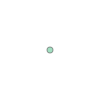

In [51]:
print(type(gdf))
print(type(gdf.geometry))
print(gdf.geometry.iloc[1]) # Print out the object's contents
gdf.geometry.iloc[1] # The object knows how to print itself as a point

In [62]:
#Saving Geo-Data Locally
boros.to_file('test.gpkg') # This won't do what we want
boros.to_file('test.gpkg', driver='GPKG')

MULTIPOLYGON (((535009.2 159504.7, 535005.5 159502, 535002.9 159500.1, 535000.1 159503.2, 535000 159503.2, 534747.8 159517.8, 534588 159522.1, 534512.3 159780.5, 534474.8 159760.8, 534398.8 159726.7, 534391.9 159723.3, 534378.9 159712.4, 534345.1 159702.8, 534314.3 159691.8, 534292.7 159683.9, 534253.1 159666.6, 534229.4 159657.9, 534207.5 159654.6, 534160.5 159651.5, 534159.7 159637.1, 534109.5 ...


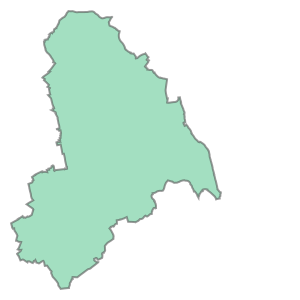

In [64]:
print(str(boros.geometry.iloc[1])[:399] + "...") # Object to string then print out first 399 characters
boros.geometry.iloc[1] # So this is a multi-polygon boundary

In [65]:
#reprojection
print(gdf.geometry.crs)
print(gdf.total_bounds)
gdf.plot(figsize=(12,8), marker='*', color='green', markersize=0.25)

epsg:4326


GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring